In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
feature_name_df = pd.read_csv('./human_activity/features.txt', 
                              sep='\s+',
                              header=None, # 컬럼명 없을 때 None 사용
                              names=['column_index', 'column_name']
                             )

In [3]:
feature_name_df.head(3)

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z


In [4]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [5]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df[feature_dup_df['column_index'] > 1].head()

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [34]:
def get_new_feature_name_df(old) :
    feature_dup_df = pd.DataFrame(data=old.groupby('column_name').cumcount(), 
                                  columns=['dup_cnt']) # cumcount 같은 데이터에 대해서 카운트 해준다.

    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old.reset_index(), feature_dup_df, how='outer')

    new_feature_name_df['column_name'] = new_feature_name_df[ ['column_name', 'dup_cnt'] ].apply(
        lambda x : x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1 ) # 넘어오는 데이터 두개를 x로 받음. => 인덱싱으로 접근. x[0], x[1]
    new_feature_name_df = new_feature_name_df.drop(columns=['index'])
    
    return new_feature_name_df

In [35]:
df = get_new_feature_name_df(feature_name_df)
df[ df['dup_cnt'] > 0 ]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
...,...,...,...
497,498,"fBodyGyro-bandsEnergy()-17,32_2",2
498,499,"fBodyGyro-bandsEnergy()-33,48_2",2
499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,501,"fBodyGyro-bandsEnergy()-1,24_2",2


In [40]:
def get_human_dataset() :
    feature_name_df = pd.read_csv('./human_activity/features.txt', 
                              sep='\s+',
                              header=None, # 컬럼명 없을 때 None 사용
                              names=['column_index', 'column_name']
                             )
    
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    X_train = pd.read_csv('./human_activity/train/X_train.txt',
                          sep='\s+',
                          names=feature_name)
    
    X_test = pd.read_csv('./human_activity/test/X_test.txt',
                          sep='\s+',
                          names=feature_name)
    
    y_train = pd.read_csv('./human_activity/train/y_train.txt',
                          sep='\s+',
                          header=None,
                          names=['action'])
    
    y_test = pd.read_csv('./human_activity/test/y_test.txt',
                          sep='\s+',
                          header=None,
                          names=['action'])
    
    return X_train, X_test, y_train, y_test

In [43]:
X_train, X_test, y_train, y_test = get_human_dataset()

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [48]:
X_train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339


In [50]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [51]:
y_test['action'].value_counts()

6    537
5    532
1    496
4    491
2    471
3    420
Name: action, dtype: int64

---

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [53]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.8547675602307431

In [54]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

---

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
params = {'max_depth' : [6,8,10,12,16,20,24],
          }

In [61]:
gridcv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [63]:
cv_result_df = pd.DataFrame(gridcv.cv_results_)
cv_result_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [65]:
max_depth = [6,8,10,12,16,20,24]

for depth in max_depth : 
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print(f'max_depth : {depth}, 정확도 : {accuracy:.4f}')

max_depth : 6, 정확도 : 0.8558
max_depth : 8, 정확도 : 0.8707
max_depth : 10, 정확도 : 0.8673
max_depth : 12, 정확도 : 0.8646
max_depth : 16, 정확도 : 0.8575
max_depth : 20, 정확도 : 0.8548
max_depth : 24, 정확도 : 0.8548


---

In [66]:
params = {'max_depth' : [8,12,16,20],
          'min_samples_split' : [16, 24], 
          }

In [67]:
%%time
gridcv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 13.7 s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24, random_state=156),
             n_jobs=-1,
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy', verbose=1)

In [69]:
%%time
gridcv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
gridcv.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Wall time: 1min 21s


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24, random_state=156),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy', verbose=1)

In [70]:
gridcv.best_score_

0.8548794147162603

In [72]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_split=16, random_state=156)

In [73]:
best_df_clf = gridcv.best_estimator_

In [75]:
pred = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
accuracy

0.8717339667458432

---

In [77]:
best_df_clf.feature_importances_[:20]

array([0.        , 0.        , 0.        , 0.        , 0.00175182,
       0.        , 0.        , 0.        , 0.        , 0.00217984,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [83]:
ftr_importance = pd.Series(best_df_clf.feature_importances_, index=X_train.columns)
top20 = ftr_importance.sort_values(ascending=False)[:20]

<AxesSubplot:>

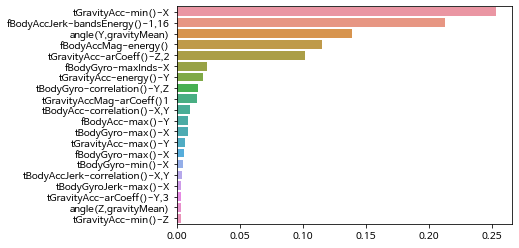

In [86]:
import seaborn as sns
sns.barplot(x=top20, y=top20.index)